In [1]:
import sys
sys.path.append('../source_code')
import data_utils as dl
import numpy as np
import ecg_utils as ecg
import matplotlib.pyplot as plt


Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.0004291534423828125 seconds
Execution time for threshold_calc: 0.000125885009765625 seconds


TypeError: peak() got an unexpected keyword argument 'TH'

## Loading in Apple Watch Data
The apple watch data is stored in a .csv file. The data is loaded into a pandas dataframe and the first 10 rows are removed, and the rest is the juicy signal to which we convert and export into a numpy array.

In [2]:
import data_utils as data
apple_watch_ecg = data.ecg_data(file_path='../data/ecg_2023-09-28.csv')
apple_watch_ecg.lead_1.r_plot()

Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.00044083595275878906 seconds
Execution time for threshold_calc: 4.57763671875e-05 seconds


TypeError: peak() got an unexpected keyword argument 'TH'

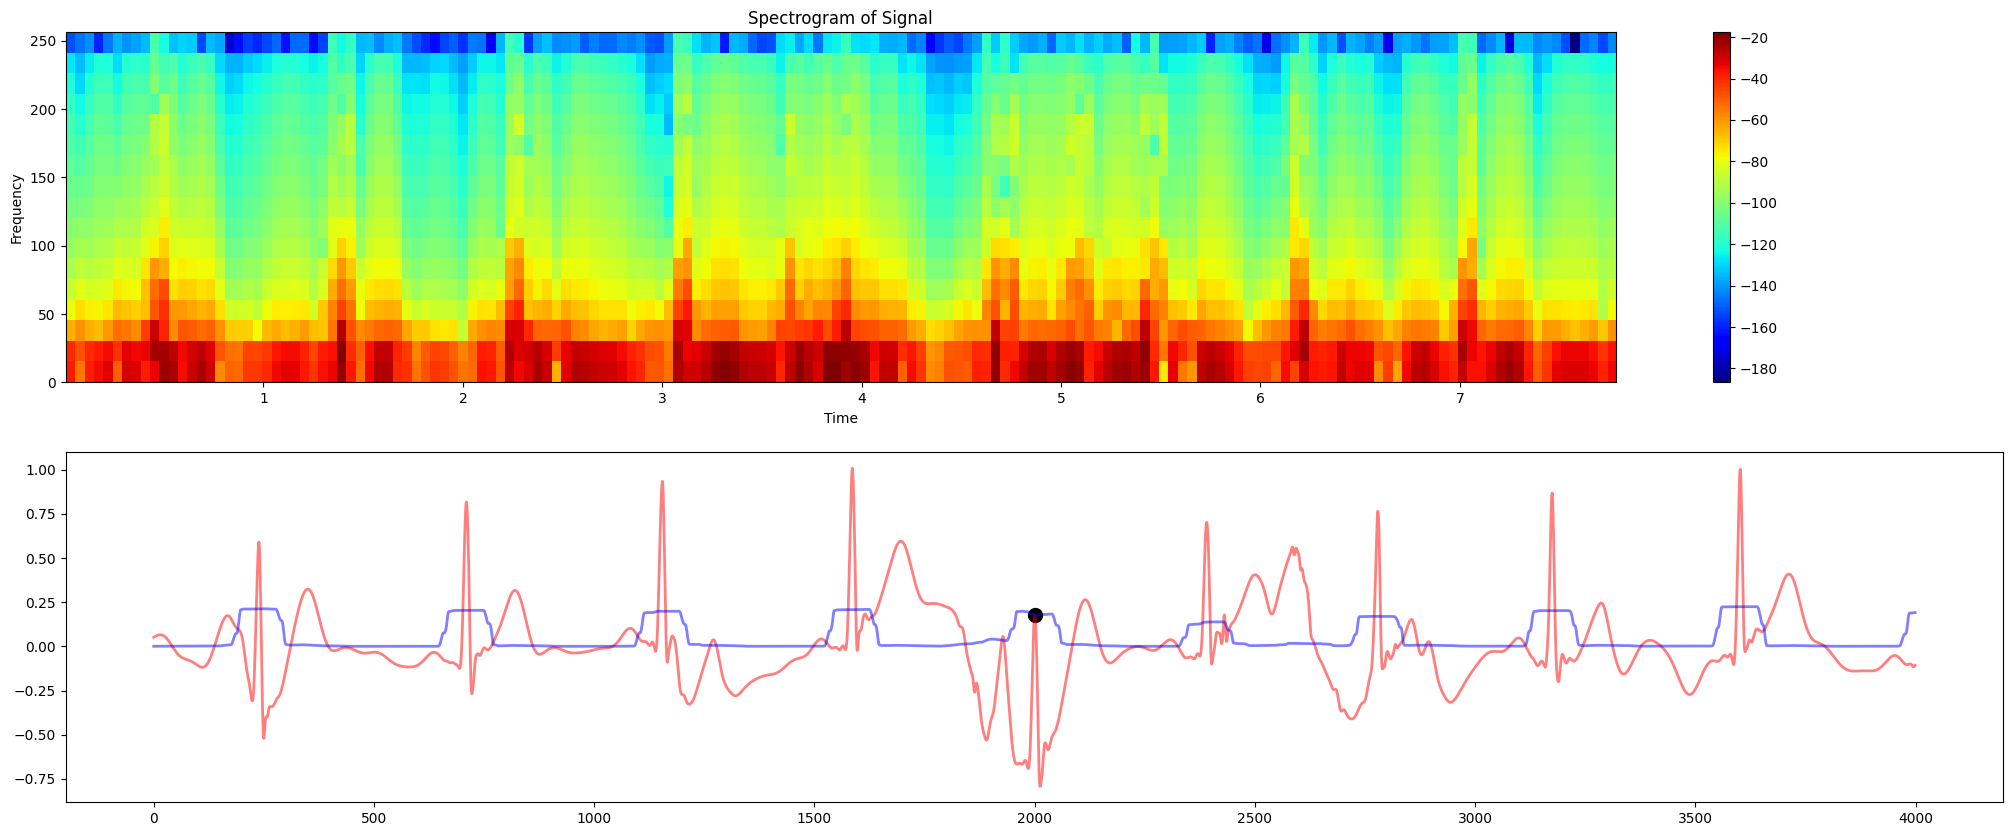

In [ ]:
noise = apple_watch_ecg.lead_1.r_peaks[:,0][np.argmax(apple_watch_ecg.lead_1.r_peaks[:,1])]
t = noise
plt.figure(figsize=(25, 10))

# First subplot
plt.subplot(2, 1, 1)
plt.specgram(apple_watch_ecg.lead_1.signal[t-2000:t+2000], Fs=apple_watch_ecg.fs, NFFT=32, noverlap=8, cmap='jet')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Spectrogram of Signal')

plt.subplot(2, 1, 2)
plt.plot(apple_watch_ecg.lead_1.signal[t-2000:t+2000], 'r', linewidth=2, alpha=0.5,label='Mean Signal')
plt.plot(apple_watch_ecg.lead_1.window[t-2000:t+2000], 'b', linewidth=2, alpha=0.5,label='Mean Signal')
plt.scatter(2000, apple_watch_ecg.lead_1.signal[t], s=100, c='k', marker='o', label='R Peak')

plt.show()


In [ ]:
## 3D Vectorcardiography

# Load the data
ecg_data = data.ecg_data(file_path='/Users/kevindejbod/dynamic_ecg/data/sample_ecg.npz')

Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.00978994369506836 seconds
Execution time for threshold_calc: 0.00047206878662109375 seconds
Execution time for peak: 0.0010612010955810547 seconds
Execution time for r_wave_detector: 0.01137089729309082 seconds
Execution time for threshold_calc: 0.0004029273986816406 seconds
Execution time for peak: 0.0010631084442138672 seconds
Execution time for p_wave_detector: 0.0038328170776367188 seconds
Execution time for calculate_rr_int: 2.09808349609375e-05 seconds
Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.009737968444824219 seconds
Execution time for threshold_calc: 0.0007066726684570312 seconds
Execution time for peak: 0.0009720325469970703 seconds
Execution time for r_wave_detector: 0.011455059051513672 seconds
Execution time for threshold_calc: 0.0002980232238769531 seconds
Execution time for peak: 0.0007369518280029297 seconds
Execution time for p_wave_detector: 0.003403186798095703 seco

MovieWriter imagemagick unavailable; using Pillow instead.


Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.010174989700317383 seconds
Execution time for threshold_calc: 0.00047397613525390625 seconds
Execution time for peak: 0.0010781288146972656 seconds
Execution time for r_wave_detector: 0.011770963668823242 seconds
Execution time for threshold_calc: 0.0003609657287597656 seconds
Execution time for peak: 0.0008711814880371094 seconds
Execution time for p_wave_detector: 0.0036439895629882812 seconds
Execution time for calculate_rr_int: 2.09808349609375e-05 seconds
Signal not too long, not slicing
Execution time for grad_sqaure_conv: 0.009713888168334961 seconds
Execution time for threshold_calc: 0.0002789497375488281 seconds
Execution time for peak: 0.0007560253143310547 seconds
Execution time for r_wave_detector: 0.01076507568359375 seconds
Execution time for threshold_calc: 0.0002498626708984375 seconds
Execution time for peak: 0.0008530616760253906 seconds
Execution time for p_wave_detector: 0.0033860206604003906 se

KeyboardInterrupt: 

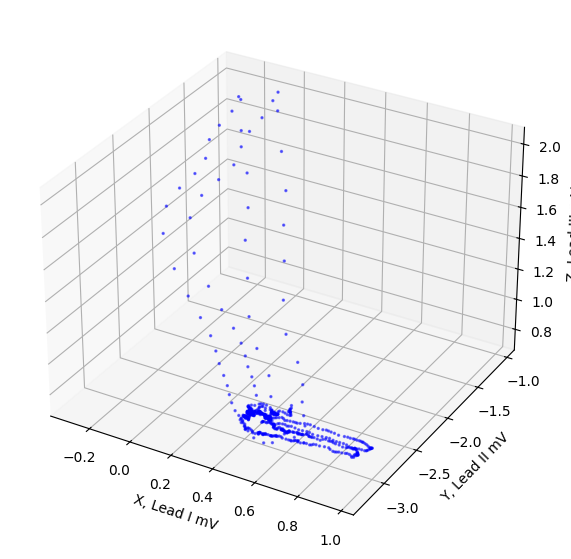

In [ ]:
import html
from turtle import ht
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
# Load the data

sig = dl.ecg_data(file_path='/Users/kevindejbod/dynamic_ecg/data/sample_ecg.npz')

import matplotlib.animation as animation

# Create a DataFrame
data = pd.DataFrame({
    'X': sig.lead_1.signal[1000:2000],
    'Y': sig.lead_2.signal[1000:2000],
    'Z': sig.lead_3.signal[1000:2000]
})

# Create a figure and axes
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Initialize the plot
scatter = ax.scatter(data['X'], data['Y'], data['Z'], marker='o', color='b', s=2, alpha=0.5)

# Set labels
ax.set_xlabel('X, Lead I mV')
ax.set_ylabel('Y, Lead II mV')
ax.set_zlabel('Z, Lead III mV')

# Animation update function
def update(frame):
    scatter._offsets3d = (data['X'][:frame], data['Y'][:frame], data['Z'][:frame])
    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(data), interval=10, blit=True)

# Show the animation in notebook
ani.save('3d_ecg.gif', writer='imagemagick', fps=60)

In [ ]:
https://www.google.com.au/search?q=https%3A%2F%2Fwww.google.com%2Fsearch%3Fclient%3Dsafari%26rls%3Den%26q%3Dvectorcardiogram%26ie%3DUTF-8%26oe%3DUTF-8&client=safari&sca_esv=72b5dcfca6c326d8&sca_upv=1&source=hp&ei=8LMPZtTPEvOSseMPqeyx-A0&iflsig=ANes7DEAAAAAZg_CAO-6gvYD_mHpmSFgmOwtAGcR_yah&ved=0ahUKEwjUh5bb0aqFAxVzSWwGHSl2DN8Q4dUDCBY&uact=5&oq=https%3A%2F%2Fwww.google.com%2Fsearch%3Fclient%3Dsafari%26rls%3Den%26q%3Dvectorcardiogram%26ie%3DUTF-8%26oe%3DUTF-8&gs_lp=Egdnd3Mtd2l6IldodHRwczovL3d3dy5nb29nbGUuY29tL3NlYXJjaD9jbGllbnQ9c2FmYXJpJnJscz1lbiZxPXZlY3RvcmNhcmRpb2dyYW0maWU9VVRGLTgmb2U9VVRGLThIdlAAWABwAHgAkAEAmAEAoAEAqgEAuAEDyAEA-AEC-AEBmAIAoAIAmAMAkgcAoAcA&sclient=gws-wiz